#5. Basic Transforms#

In this notebook we will look at some basic Fourier transform pairs.

First import the necessary modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

There are some basic Fourier transfom pairs that are worth knowing, because you'll see them all over the place (including later in this course!) and they can be used to create more complex functions, as we will see later.
<br/>
First lets make a couple of convenience functions using the fourier transform provided by numpy (don't worry about the details of this now!):

In [2]:
def ft(y):
    """Returns the fourier transform of y"""
    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))

def ftfreqs(N,dt):
    """Returns the Fourier frequencies"""
    return np.fft.fftshift(np.fft.fftfreq(N,dt))

Now lets define some of the frequently used functions here, then we can play with taking their Fourier transforms.

In [3]:
# constant function of amplitude A
def constant(t,A):
    return A*np.ones(len(t))

In [4]:
# spike of amplitude A at given value of t
def spike(t,t0,A):
    output = np.zeros(len(t))
    output[t==t0] = A
    print sum(t==t0)
    return output

In [5]:
# top-hat function
def tophat(t,width,A):
    output = np.zeros(len(t))
    output[abs(t)<width/2.0] = A
    return output

In [6]:
# sinc function
def sincfunc(t,scale):
    return np.sinc(t/scale)

In [7]:
# gaussian function
def gaussian(t,sigma):
    return (1./(np.sqrt(2.*np.pi)*sigma))*np.exp(-t**2.0/(2.0*sigma**2.0))

In [8]:
# comb function
def comb(t,t_space,A):
    output = np.zeros(len(t))
    mod_array = np.array([round(i,2)%t_space for i in t])
    output[mod_array==0] = A
    return output

Now lets play with these functions and their Fourier transforms. First lets do a single cosine, just to check all is well:

In [9]:
delta_t = 1.0
t = np.arange(-200,200,delta_t)     # set x-axis values

In [10]:
y = 5.0*np.cos(2.*np.pi*t/50.)         # create function
Y = ft(y)                           # Fourier transform
freqs = ftfreqs(len(y),delta_t)

In [19]:
# Y

We will plot the signal y(t), and its Fourier transform Y(f). 

Y(f) is is complex - so we plot its amplitude, real part, and imaginary part separately.

(-0.05, 0.05)

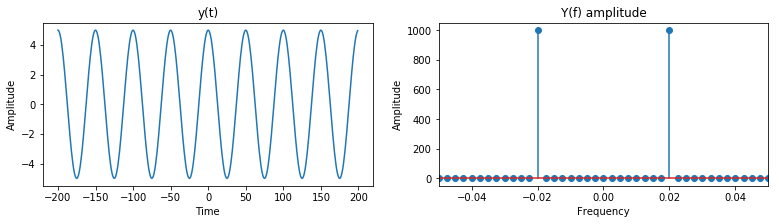

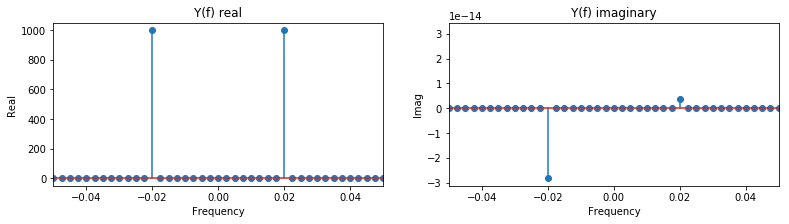

In [11]:
f, ax1 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax1[0].plot(t,y)
ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Amplitude')
ax1[0].set_title('y(t)')

ax1[1].stem(freqs,abs(Y))
ax1[1].set_xlabel('Frequency')
ax1[1].set_ylabel('Amplitude')
ax1[1].set_title('Y(f) amplitude')

# try setting the x limits to zoom in to the Fourier transform:
ax1[1].set_xlim(-0.05,0.05)

f, ax2 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax2[0].stem(freqs,Y.real)np.fft.fftshift
ax2[0].set_xlabel('Frequency')
ax2[0].set_ylabel('Real')
ax2[0].set_title('Y(f) real')

ax2[1].stem(freqs,Y.imag)
ax2[1].set_xlabel('Frequency')
ax2[1].set_ylabel('Imag')
ax2[1].set_title('Y(f) imaginary')

# try setting the x limits to zoom in to the Fourier transform:
ax2[0].set_xlim(-0.05,0.05)
ax2[1].set_xlim(-0.05,0.05)

Does that look like what you expect?
<br/>
Now lets try the functions we've defined above:

In [12]:
delta_t = 1.0
t = np.arange(-200,200,delta_t)     # set x-axis values

In [13]:
y=comb(t,10.,10.)                   # create function
Y = ft(y)                           # Fourier transform
freqs = ftfreqs(len(y),delta_t)

(-0.2, 0.2)

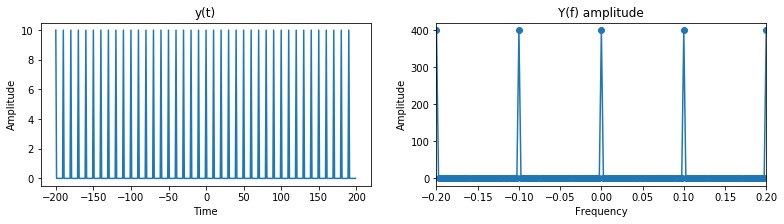

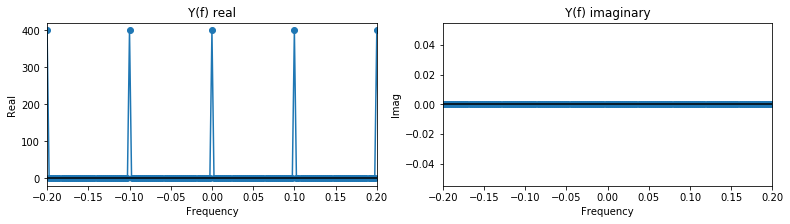

In [14]:
f, ax1 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax1[0].plot(t,y)
ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Amplitude')
ax1[0].set_title('y(t)')

ax1[1].plot(freqs,abs(Y),'o-')
ax1[1].set_xlabel('Frequency')
ax1[1].set_ylabel('Amplitude')
ax1[1].set_title('Y(f) amplitude')

# try setting the x limits to zoom in to the Fourier transform:
ax1[1].set_xlim(-0.2,0.2)

f, ax2 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax2[0].plot(freqs,Y.real,'-o')
ax2[0].set_xlabel('Frequency')
ax2[0].set_ylabel('Real')
ax2[0].set_title('Y(f) real')
ax2[0].axhline(y=0,color='k')

ax2[1].plot(freqs,Y.imag,'-o')
ax2[1].set_xlabel('Frequency')
ax2[1].set_ylabel('Imag')
ax2[1].set_title('Y(f) imaginary')
ax2[1].axhline(y=0,color='k')

# try setting the x limits to zoom in to the Fourier transform:
ax2[0].set_xlim(-0.2,0.2)
ax2[1].set_xlim(-0.2,0.2)

You can fiddle, but some suggested functions and parameters are:

* constant(t,10.)
* spike(t,0.0,10.)
* tophat(t,30.,10.)
* sincfunc(t,10.)
* gaussian(t,10.)
* comb(t,20.,10.)

Try making the parameters larger and smaller, and see what the effect is in the Fourier domain.

We can also combine functions. For example:

In [15]:
y = sincfunc(t,20.)*sincfunc(t,20.)   # create function
Y = ft(y)                             # Fourier transform
freqs = ftfreqs(len(y),delta_t)

(-0.3, 0.3)

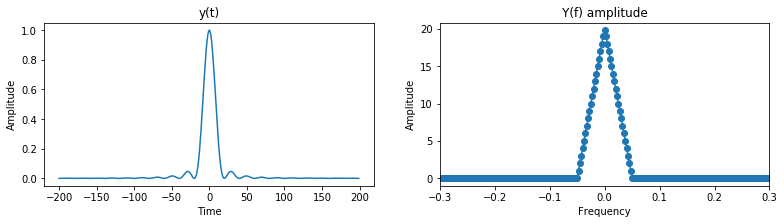

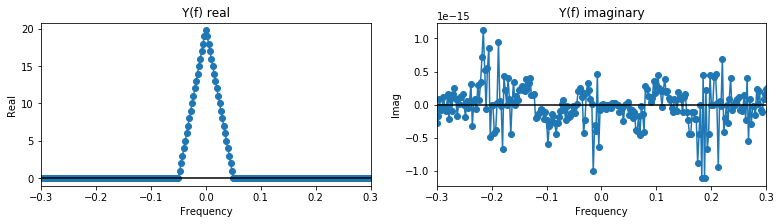

In [16]:
f, ax1 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax1[0].plot(t,y)
ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Amplitude')
ax1[0].set_title('y(t)')

ax1[1].plot(freqs,abs(Y),'o-')
ax1[1].set_xlabel('Frequency')
ax1[1].set_ylabel('Amplitude')
ax1[1].set_title('Y(f) amplitude')

# try setting the x limits to zoom in to the Fourier transform:
ax1[1].set_xlim(-0.3,0.3)

f, ax2 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax2[0].plot(freqs,Y.real,'o-')
ax2[0].set_xlabel('Frequency')
ax2[0].set_ylabel('Real')
ax2[0].set_title('Y(f) real')
ax2[0].axhline(y=0,color='k')

ax2[1].plot(freqs,Y.imag,'o-')
ax2[1].set_xlabel('Frequency')
ax2[1].set_ylabel('Imag')
ax2[1].set_title('Y(f) imaginary')
ax2[1].axhline(y=0,color='k')

# try setting the x limits to zoom in to the Fourier transform:
ax2[0].set_xlim(-0.3,0.3)
ax2[1].set_xlim(-0.3,0.3)

Question to think about:
    
* We see that the imaginary part of the Fourier transform is ~zero in many cases. Which cases are these? 
  (Another way of asking the question - when can we neglect the imaginary part of the Fourier transform, and just look at the amplitude?)

###Version information###

In [17]:
import os, sys
import numpy
import matplotlib
import IPython

print 'OS:          ', os.name, sys.platform
print 'Python:      ', sys.version.split()[0]
print 'IPython:     ', IPython.__version__
print 'Numpy:       ', numpy.__version__
print 'matplotlib:  ', matplotlib.__version__

OS:           posix linux2
Python:       2.7.12
IPython:      5.8.0
Numpy:        1.15.4
matplotlib:   2.2.3
